## **FTK (FOR THE KIDS) - CMPINF0010 FINAL PROJECT**


*INTRODUCTION*      
When considering what would qualify a neighborhood as being the best, we decided that it should be based on each neighborhood's funness level. And what group of people are the best at decided whether something is fun or not? Kids.

Using the datasets provided by the WPRDC, we narrowed down the factors for the funnest neighborhood in Pittsburgh to:
* pools
* courts/rinks
* playgrounds


*THE METRIC*    
We decided the best way of judging which neighborhood won each factor differed between them. 

Courts/rinks and playgrounds were decided simply based on which neighborhood had the highest count. 

Pools were decided based how much pool there was in each neighborhood. Than they would be given a score based on their ranking from largest to smallest. 1st place is given 15 points, 2nd place gets 14 points, and so on.

*THE DATA*    
First we import pandas, geopandas, and matplotlib. Also, we set the style and color theme of future graphs. Then we import the data as follows:         

courtsnrinks --> courts and rinks data         
courtsnrinks_dict --> dictionary from the courtsnrinks data            
pools --> pool data        
pools_dict --> dictionary from the pools data     
poolcscap_dict --> dictionary from the pool capacity data        
pool_ranking --> ranking of the greatest volume pools           
playgrounds --> playground data        
playgrounds_dict --> dictionary of the playground data         
finalscores --> final score ranking          
    

In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')
colors = ['darkseagreen', 'steelblue', 'lightcoral', 'slategrey', 'lightsteelblue']

courtsnrinks = pd.read_csv('https://data.wprdc.org/datastore/dump/a5b71bfa-840c-4c86-8f43-07a9ae854227')
courtsnrinks_dict = dict()
pools = pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a")
pools_dict = dict()
playgrounds = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")
playgrounds_dict = dict()
poolscap_dict = dict()

*MAPS*         
Here we set the base maps of the neighborhoods in the Pittsburgh areas.

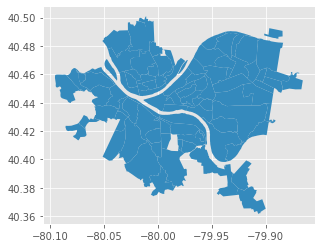

In [4]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

__________________________________________________________________________________________________________________________________

**PART ONE: COURTS AND RINKS**     
Here we make the courtsnrinks data frame easier to read.      
We iterate through the data frame and make a new item whenever it is a new neighborhood. If the neighborhood is already in the dictionary, we will just add one to the total of the item.     

In [5]:
for i in range(len(courtsnrinks)):

    item = courtsnrinks.loc[i, 'neighborhood']
    
    if item in courtsnrinks_dict: 
        courtsnrinks_dict[item] += 1 
    else:
        courtsnrinks_dict[item] = 1 

Now we convert the dictionary back to a series.

In [6]:
courtsnrinks_series = pd.Series(courtsnrinks_dict, name = "Courts")

Than we sort the values from greatest to least and print out the 10 neighborhoods with the most courts and parks.

In [7]:
courtsnrinks_series.sort_values(ascending=False)[:10]

Squirrel Hill South    26
Highland Park          20
Hazelwood              10
Beltzhoover             9
Brookline               9
Allegheny Center        9
Troy Hill               8
Beechview               7
South Side Slopes       6
Lower Lawrenceville     6
Name: Courts, dtype: int64

Now lets make a bar graph using plot.bar() to visually represent the top 10 data.

Text(0, 0.5, '# of Courts/Rinks')

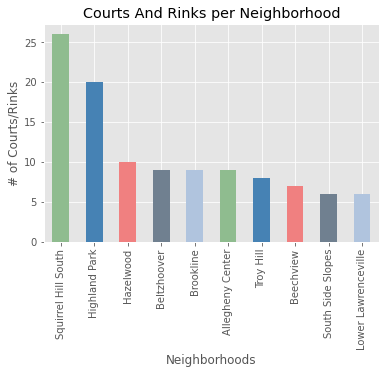

In [8]:
courtsnrinks_series.sort_values(ascending=False)[:10].plot.bar(color=colors)
plt.title('Courts And Rinks per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('# of Courts/Rinks')

*MAPS*         
Now we are going to plot the positions of the courts and rinks onto a map. This is not exactly necessary, but it is kinda cool.

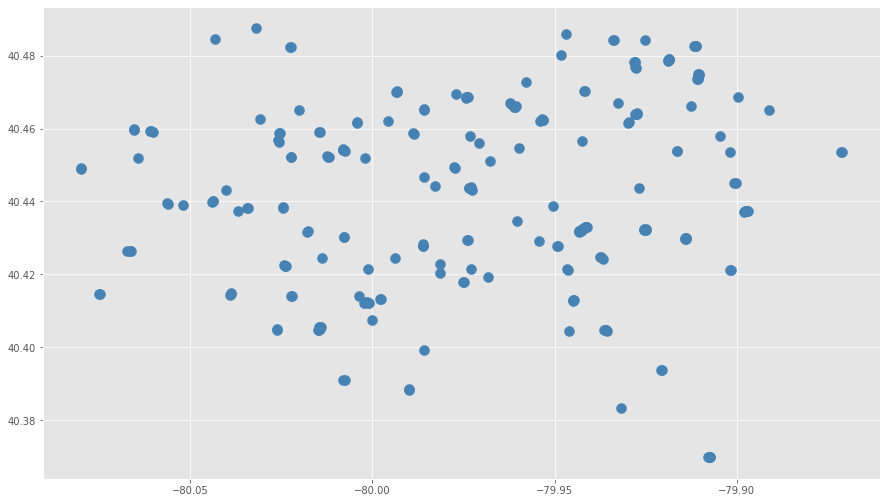

In [9]:
courtsnrinks['coordinates'] = courtsnrinks[['longitude','latitude']].values.tolist()
courtsnrinks['coordinates'] = courtsnrinks['coordinates'].apply(Point)

courtsnrinks_graph = gpd.GeoDataFrame(courtsnrinks, geometry = 'coordinates')
courtsnrinks_graph.plot(color='steelblue', figsize=(15,15), markersize=100)

That diagram is useless without a map behind it so let us add that. Each neighborhood has a different color.

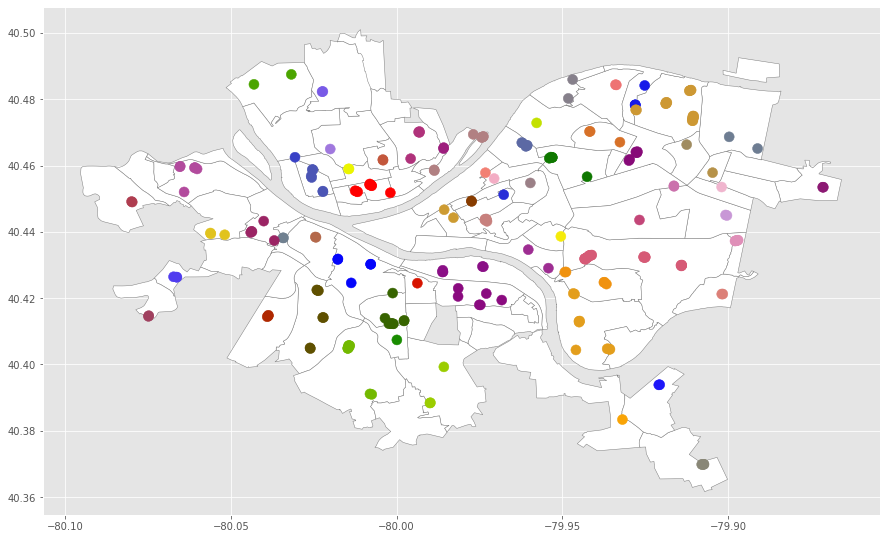

In [10]:
base = neighborhoods.plot(color='white', edgecolor='gray', figsize=(15,15))
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('custom blue', [(0,'red'), (0.10, 'green'), (0.20, 'yellow'), (0.30,'purple'), 
                                                         (0.40, 'orange'), (0.50, 'slategrey'), (0.60,'blue'), (0.70, 'pink'), 
                                                         (0.80, 'purple'), (0.90,'salmon'), (1, 'slategrey')], N=256)

courtsnrinks_graph.plot(ax=base, column='neighborhood', markersize=100, cmap=cmap)

cool!

*CONCLUSION 4 COURTS AND RINKS*

In [11]:
finalscores = dict(courtsnrinks_series)

The 5 neighborhoods with the most courts and rinks are:
1. Squirrel Hill South (26 c/r)
2. Highland Park (20 c/r)
3. Hazelwood (10 c/r)
4. Beltzhoover (9 c/r)
5. Brookline (9 c/r)

In [12]:
courtsnrinks_series.sort_values(ascending=False)[:5]

Squirrel Hill South    26
Highland Park          20
Hazelwood              10
Beltzhoover             9
Brookline               9
Name: Courts, dtype: int64

__________________________________________________________________________________________________________________________________

**PART TWO: POOLS**

First we want to clean up the data. Here we iterate through the dataset to see which neighborhood had the greatest amount of pools. If the neighborhood name is not already in the dictionary, it gets added. If it is in there, the number associated with it increases by one.

In [13]:
for i in range(len(pools)):
    item = pools.loc[i, 'neighborhood']
    if item in pools_dict:
        pools_dict[item] += 1 
    else:
        pools_dict[item] = 1

Now we convert the dictionary into it's easier to use version, a series.

In [14]:
pool_series = pd.Series(pools_dict, name = "neighborhood")
pool_series.sort_values(ascending = False)[:10]

South Side Flats       2
Highland Park          2
Bedford Dwellings      1
South Side Slopes      1
Westwood               1
Polish Hill            1
Beltzhoover            1
Allegheny Center       1
Sheraden               1
Squirrel Hill South    1
Name: neighborhood, dtype: int64

Now we can put this data into a not so interesting bar graph.

Text(0, 0.5, '# of Pools')

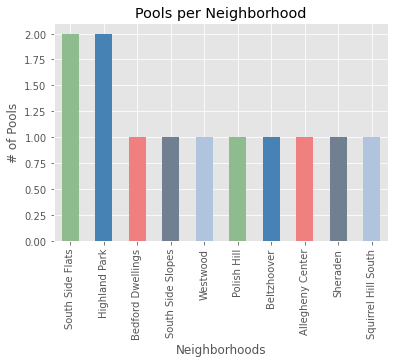

In [15]:
pool_series.sort_values(ascending=False)[:10].plot.bar(color=colors)
plt.title('Pools per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('# of Pools')

Since this data is not very useful, I decided to measure it by the size of the pool vs. the population. This makes it much more interesting and better to use.         
Here I am iterating through the pool data again, but adding the capacity size into it instead of the number of times that neighborhood appears.

In [16]:
for i in range(len(pools)):
    item = pools.loc[i, 'neighborhood']
    if item in poolscap_dict:
        poolscap_dict[item] += pools.loc[i, 'capacity']
    else:
        poolscap_dict[item] = pools.loc[i, 'capacity']

Then I turned it into a series.

In [17]:
poolcap_series = pd.Series(poolscap_dict, name = "neighborhood")
poolcap_series.sort_values(ascending = False)[:10]

Bedford Dwellings    538000.0
Brookline            417657.0
Mount Washington     356000.0
Bloomfield           335000.0
South Side Flats     312800.0
Sheraden             278000.0
Allegheny Center     271000.0
Carrick              224100.0
Polish Hill          215451.0
Brighton Heights     205800.0
Name: neighborhood, dtype: float64

And then finally I turned it into a graph showing the top 10 pools based on their size.

Text(0, 0.5, 'Capacity (Liters)')

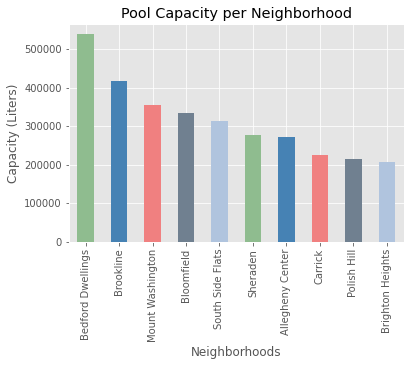

In [18]:
poolcap_series.sort_values(ascending=False)[:10].plot.bar(color=colors)
plt.title('Pool Capacity per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Capacity (Liters)')

In order to give these large numbers a more useful value, I gave each of the top 15 a score that we can use to choose the final funnest neighborhood.      
The 1st place got a score of 15, 2nd got 14, 3rd got 13, and so on until the 15th place.

Text(0, 0.5, 'Ranking Score')

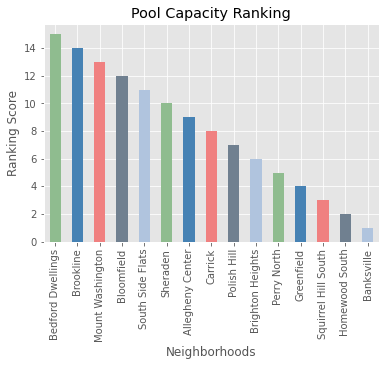

In [19]:
pool_ranking = dict(poolcap_series.sort_values(ascending=False)[:15])
count = 15
for pool in pool_ranking:
    pool_ranking[pool] = count
    count -= 1
pool_ranking_series = pd.Series(pool_ranking, name = "neighborhood")
pool_ranking_series.plot.bar(color=colors)
plt.title('Pool Capacity Ranking')
plt.xlabel('Neighborhoods')
plt.ylabel('Ranking Score')

*MAPS*

Now we create a map to show the placements of these pools, which is basically the same code as the courts and rinks map.

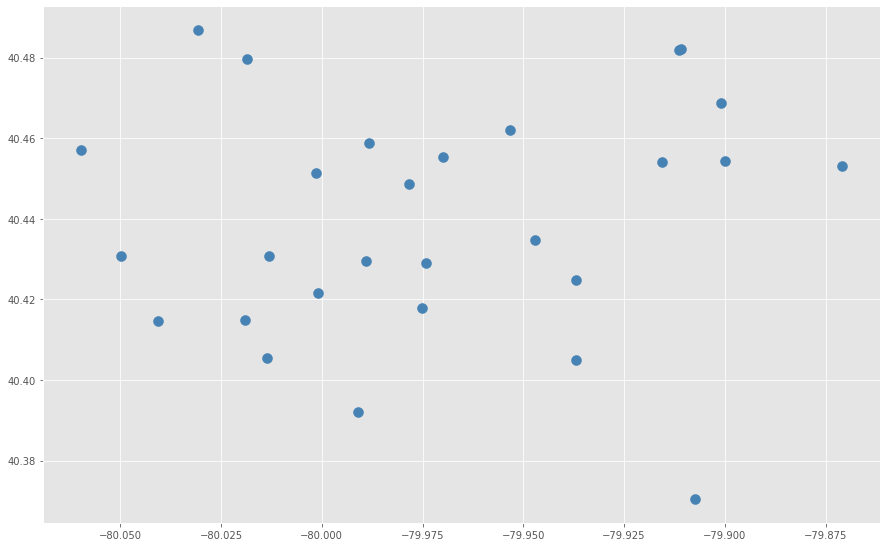

In [20]:
pools['coordinates'] = pools[['longitude','latitude']].values.tolist()
pools['coordinates'] = pools['coordinates'].apply(Point)

pools_graph = gpd.GeoDataFrame(pools, geometry = 'coordinates')
pools_graph.plot(color='steelblue', figsize=(15,15), markersize=100)

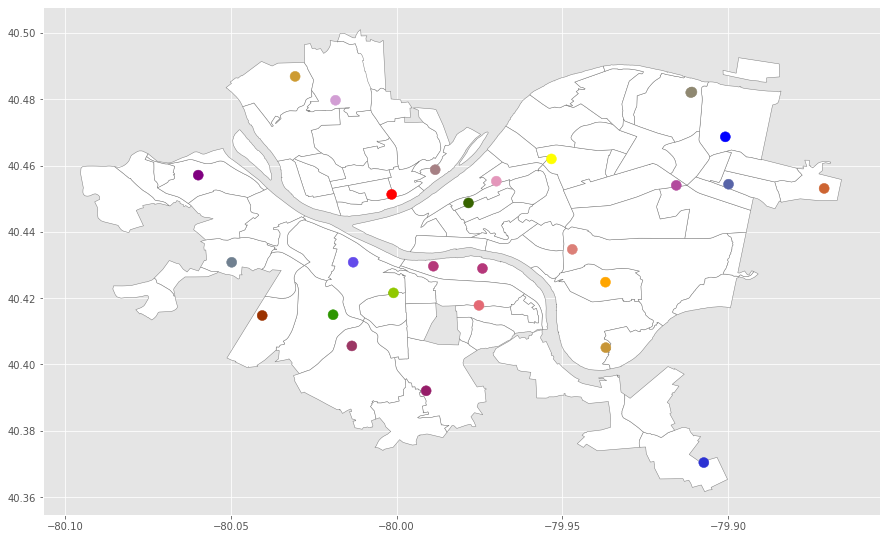

In [21]:
base = neighborhoods.plot(color='white', edgecolor='gray', figsize=(15,15))
pools_graph.plot(ax=base, column='neighborhood', markersize=100, cmap=cmap)

*CONCLUSION 4 POOLS*

The 5 neighborhoods with the most amount of pool are:
1. Bedford Dwellings (538,000L)
2. Brookline (417,657L)
3. Mount Washington (356,000L)
4. Bloomfield (335,000L)
5. South Side Flats (312,800L)

In [29]:
poolcap_series.sort_values(ascending = False)[:5]

Bedford Dwellings    538000.0
Brookline            417657.0
Mount Washington     356000.0
Bloomfield           335000.0
South Side Flats     312800.0
Name: neighborhood, dtype: float64

__________________________________________________________________________________________________________________________________                     


**PART THREE: PLAYGROUNDS**

In [23]:
for i in range(len(playgrounds)):
    item = playgrounds.loc[i, 'neighborhood']
    if item in playgrounds_dict:
        playgrounds_dict[item] += 1 
    else:
        playgrounds_dict[item] = 1

In [24]:
playgrounds_series = pd.Series(playgrounds_dict, name = "neighborhood")
playgrounds_series.sort_values(ascending = False)[:10]

Squirrel Hill South    8
Beechview              5
South Side Slopes      5
Highland Park          4
Sheraden               4
Beltzhoover            4
Allegheny Center       4
Carrick                3
Mount Washington       3
Elliott                3
Name: neighborhood, dtype: int64

Text(0, 0.5, '# of Playgrounds')

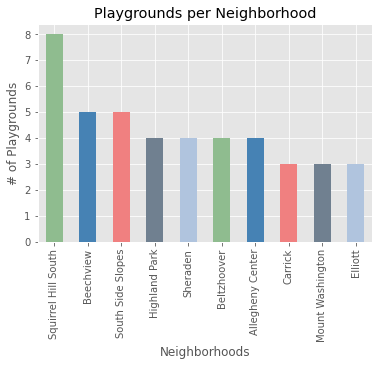

In [25]:
playgrounds_series.sort_values(ascending=False)[:10].plot.bar(color=colors)
plt.title('Playgrounds per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('# of Playgrounds')

*MAPS*        
Now we create a map to show the placements of the playgrounds, which is basically the same code as the courts and rinks and pools map.

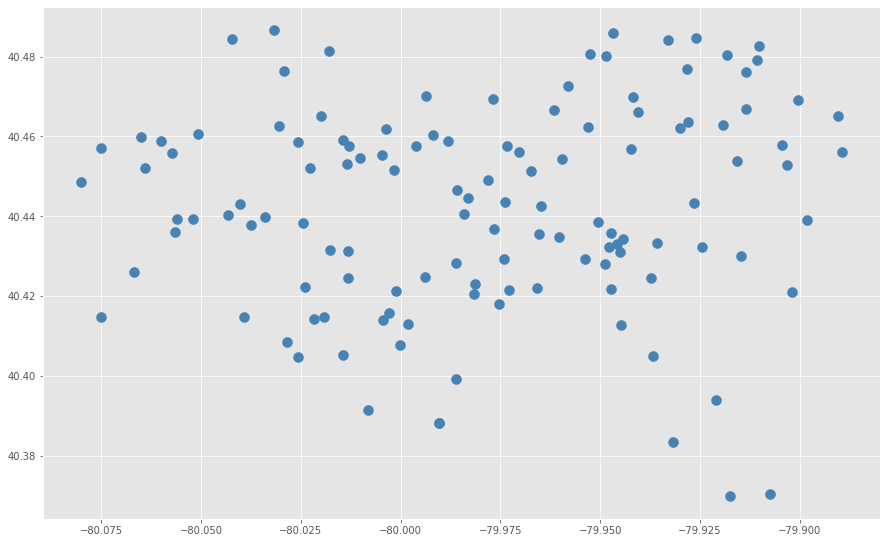

In [26]:
playgrounds['coordinates'] = playgrounds[['longitude','latitude']].values.tolist()
playgrounds['coordinates'] = playgrounds['coordinates'].apply(Point)

playgrounds_graph = gpd.GeoDataFrame(playgrounds, geometry = 'coordinates')
playgrounds_graph.plot(color='steelblue', figsize=(15,15), markersize=100)

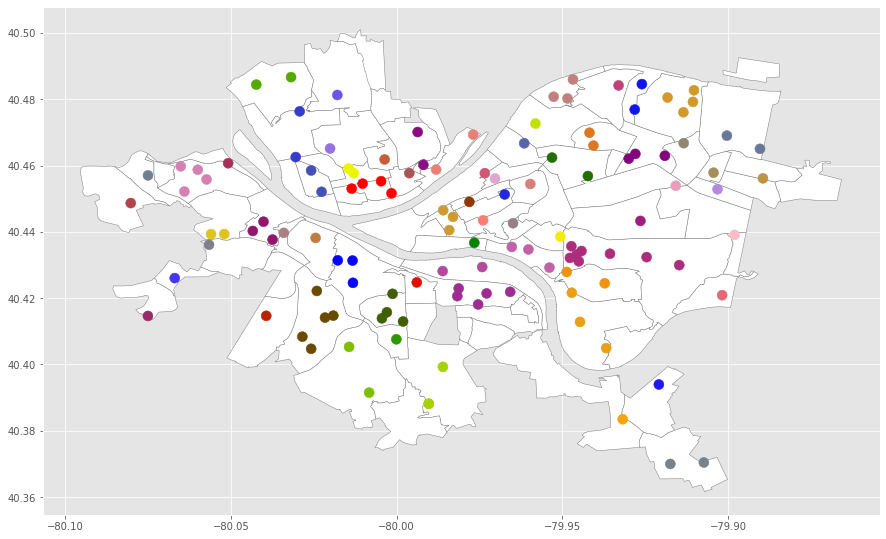

In [27]:
base = neighborhoods.plot(color='white', edgecolor='gray', figsize=(15,15))
playgrounds_graph.plot(ax=base, column='neighborhood', markersize=100, cmap=cmap)

*CONCLUSION 4 PLAYGROUND*

The 5 neighborhoods with the most playgrounds are:
1. Squirrel Hill South (8p)
2. Beechview (5p)
3. South Side Slops (5p)
4. Highland Park (4p)
5. Sheraden (4p)

In [31]:
playgrounds_series.sort_values(ascending = False)[:5]

Squirrel Hill South    8
Beechview              5
South Side Slopes      5
Highland Park          4
Sheraden               4
Name: neighborhood, dtype: int64

__________________________________________________________________________________________________________________________________                     


**CONCLUSION'S WORK**

To find which neighborhood is the most fun, we need to mash all of the data together.        
First we need to make a list of every neighborhood that is used throughout all of the datasets. I did that by iterating through each datasets neighborhoods and adding it to a new list if it is not in there already.

In [28]:
final = []
for i in range(len(pools)):
    item = pools.loc[i, 'neighborhood']
    if item not in final:
        final.append(item)
for i in range(len(playgrounds)):
    item = playgrounds.loc[i, 'neighborhood']
    if item not in final:
        final.append(item)
for i in range(len(courtsnrinks)):
    item = courtsnrinks.loc[i, 'neighborhood']
    if item not in final:
        final.append(item)
print(final)

['Bedford Dwellings', 'Banksville', 'Beechview', 'Bloomfield', 'Hazelwood', 'Troy Hill', 'East Hills', 'Highland Park', 'Homewood South', 'Brighton Heights', 'Greenfield', 'Lincoln Place', 'Shadyside', 'Brookline', 'South Side Flats', 'Carrick', 'Mount Washington', 'Perry North', 'Squirrel Hill South', 'Sheraden', 'Allegheny Center', 'Beltzhoover', 'Polish Hill', 'Westwood', 'South Side Slopes', 'Lincoln-Lemington-Belmar', 'Crawford-Roberts', 'Central Northside', 'Lower Lawrenceville', 'Homewood North', 'Bon Air', 'Central Oakland', 'Spring Garden', 'Windgap', 'Perry South', 'Homewood West', 'Strip District', 'Stanton Heights', 'Crafton Heights', 'West Oakland', 'East Carnegie', 'Duquesne Heights', 'East Liberty', 'Esplen', 'Fairywood', 'Upper Lawrenceville', 'Fineview', 'Regent Square', 'Garfield', 'South Oakland', 'Allentown', 'Hays', 'Elliott', 'Morningside', 'Terrace Village', 'Larimer', 'Central Lawrenceville', 'Manchester', 'Marshall-Shadeland', 'Oakwood', 'Upper Hill', 'New Home

Next we create a dictionary for the final values of each of the factors. This may seem weird since there are already dictionaries containing that information, but what is useful about this one is it allows us to rank which neighborhoods had the highest amount of all of the factors combined by turning it into a series.

In [82]:
finalrank = dict()
for i in range(len(final)):
    item = final[i]
    if item in pool_ranking:
        finalrank[item] = pool_ranking[item]
    else:
        finalrank[item] = 0
        
    if item in playgrounds_dict:
        finalrank[item] += playgrounds_dict[item]
    else:
        finalrank[item] = 0
        
    if item in courtsnrinks_dict:
        finalrank[item] += courtsnrinks_dict[item]
    else:
        finalrank[item] = 0

Then we create a variable containing a series with the top 15 funnest neighborhoods. The output is shown below.

In [71]:
finalrank = pd.Series(finalrank, name = "neighborhood")
final15 = finalrank.sort_values(ascending = False)[:15]
final15 = dict(final15)
print(final15)

{'Squirrel Hill South': 37, 'Brookline': 25, 'Highland Park': 24, 'Allegheny Center': 22, 'Mount Washington': 21, 'Sheraden': 20, 'Bloomfield': 19, 'Bedford Dwellings': 18, 'South Side Flats': 18, 'Carrick': 14, 'Hazelwood': 13, 'Beltzhoover': 13, 'Beechview': 12, 'South Side Slopes': 11, 'Greenfield': 11}


The keys are then added into a list without their values. The contents are shown below.

In [72]:
actualfinal = []
for i in final15:
    actualfinal.append(i)
print(actualfinal)

['Squirrel Hill South', 'Brookline', 'Highland Park', 'Allegheny Center', 'Mount Washington', 'Sheraden', 'Bloomfield', 'Bedford Dwellings', 'South Side Flats', 'Carrick', 'Hazelwood', 'Beltzhoover', 'Beechview', 'South Side Slopes', 'Greenfield']


Now all of those are put together to create a dataframe using an index of the top 15 neighborhoods and the scores of each factors dictionary.            
That dataframe is then plotted with the stacked parameter set to true, which just makes it easier to read.

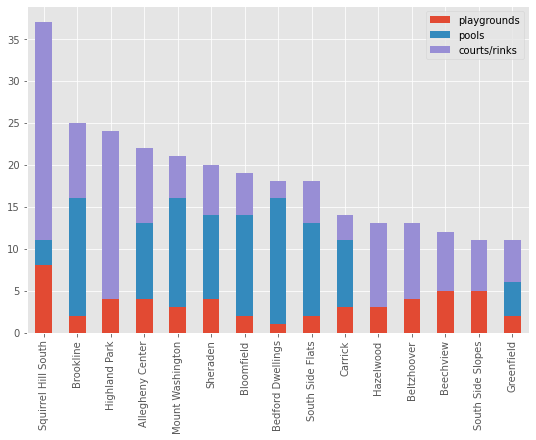

In [109]:
df = pd.DataFrame({'playgrounds': playgrounds_dict,
                   'pools': pool_ranking,
                    'courts/rinks': courtsnrinks_dict}, index = actualfinal)
df.plot.bar(stacked =True, figsize=(9, 6))

*MAPS*

Here we combined all of the previous maps that were made onto one map because it looks kinda cool.

key:
- courts/rinks = purple
- pools = blue
- playgrounds = salmon


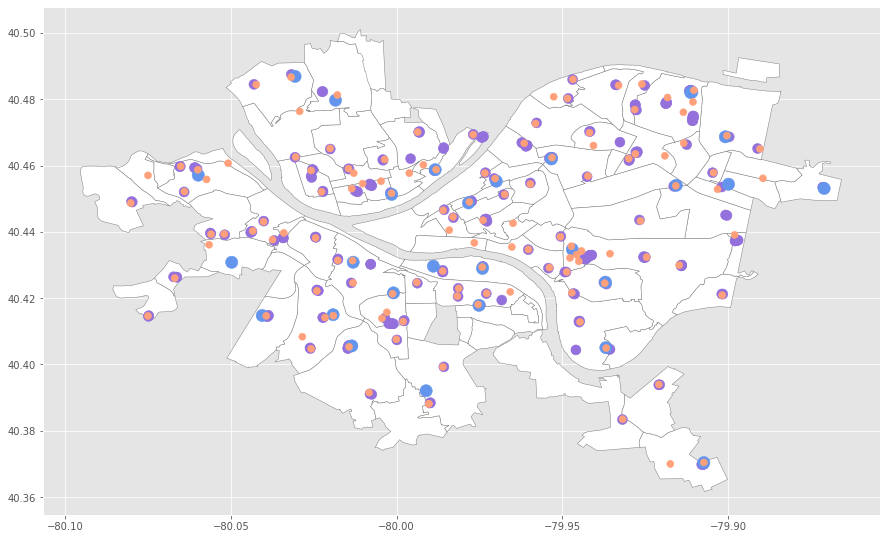

In [101]:
blue = LinearSegmentedColormap.from_list('blue', [(0,'cornflowerblue'), (1, 'cornflowerblue')])
salmon = LinearSegmentedColormap.from_list('salmon', [(0,'lightsalmon'), (1, 'lightsalmon')])
purple = LinearSegmentedColormap.from_list('purple', [(0,'mediumpurple'), (1, 'mediumpurple')])

base = neighborhoods.plot(color='white', edgecolor='gray', figsize=(15,15))
base = courtsnrinks_graph.plot(ax=base, column='neighborhood', markersize=100, cmap=purple)
base = pools_graph.plot(ax=base, column='neighborhood', markersize=150, cmap=blue)
playgrounds_graph.plot(ax=base, column='neighborhood', markersize=50, cmap=salmon)

cool map^

__________________________________________________________________________________________________________________________________                     


 **PERSONAL CONCLUSIONS**

CAM:
I have lived in Pittsburgh pretty much my whole life, but it was suprising to me about few public pools there were here. Where I live, in Allegheny County, there are pool on pretty much every corner. 

**WINNER: SQUIRREL HILL SOUTH**

Without a doubt, Squirrel Hill South won the competition for the funnest neighborhood. With it's 8 playgrounds, 26 courts, and 1 moderately sized pool, how could it not win?

Other fun neighborhoods include:       
- Brookline
- Highland Park
- Allegheny Center
- Mount Washington

the end